In [1]:
%run run_test.py

  0%|          | 0/40 [00:00<?, ?it/s]

In [2]:
import sys
sys.path.insert(1, '../src')

# fmt: off

from scipy.stats import weibull_min, norm
from models import WeibullModelExp, GaussianModel, Model
from em import EM
import utils
from utils import *
from distribution import Distribution
import seaborn as sns
from typing import NamedTuple
import numpy as np
import time
from multiprocessing import Pool
import matplotlib.pyplot as plt
import random
import pandas as pd

# fmt: on

In [3]:
import pickle
from run_test import *

with open('results.pkl', 'rb') as f:
    results: list[TestResult] = pickle.load(f)

         name                                    params  prior_probability
0  WeibullExp  (14.583885913901286, 0.8652944080971162)                1.0
samples count: 50
time         : 0.048
steps        : 2 / 32
error        : None


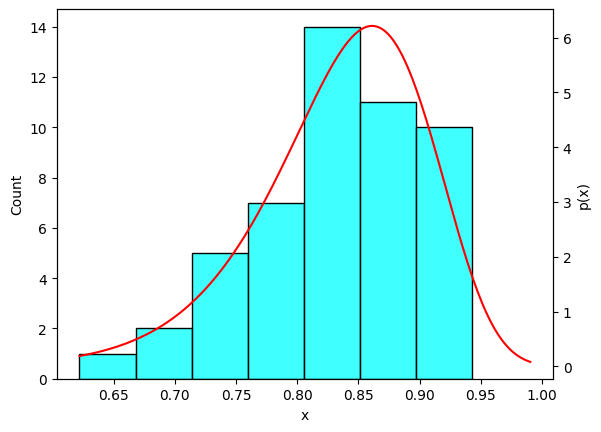



         name                                   params  prior_probability
0  WeibullExp  (14.982306334305918, 0.860731760631733)                1.0
samples count: 100
time         : 0.080
steps        : 2 / 32
error        : None


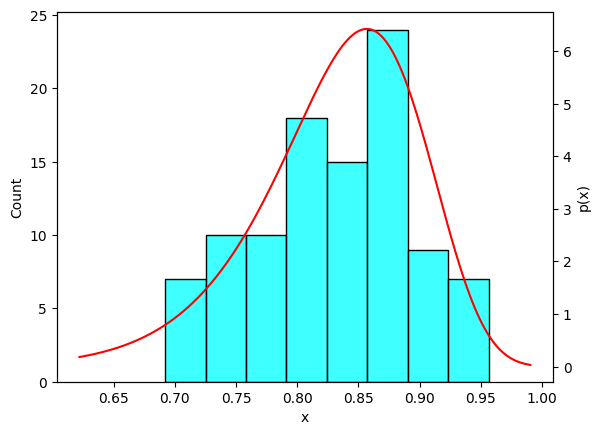



         name                                   params  prior_probability
0  WeibullExp  (17.07048739292982, 0.8682069823502298)                1.0
samples count: 200
time         : 0.131
steps        : 2 / 32
error        : None


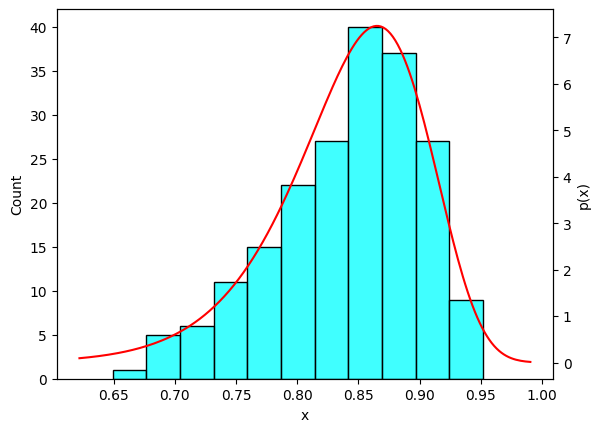



         name                                   params  prior_probability
0  WeibullExp  (15.56005299072189, 0.8646070398086182)                1.0
samples count: 500
time         : 0.286
steps        : 2 / 32
error        : None


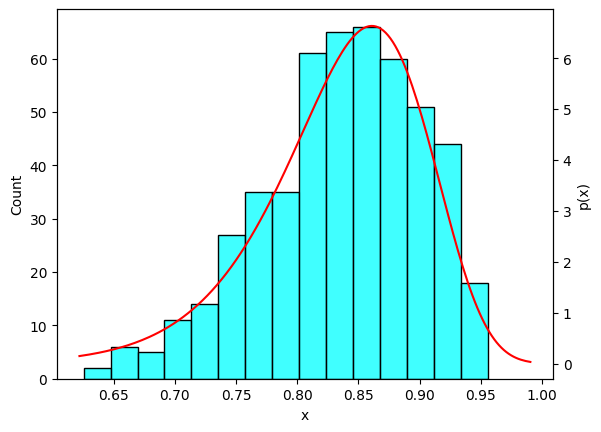



         name                                    params  prior_probability
0  WeibullExp  (3.7459403284804385, 1.7523110334580965)           0.439998
1  WeibullExp   (8.109588007311375, 11.972185107277292)           0.560002
samples count: 50
time         : 0.192
steps        : 4 / 32
error        : None


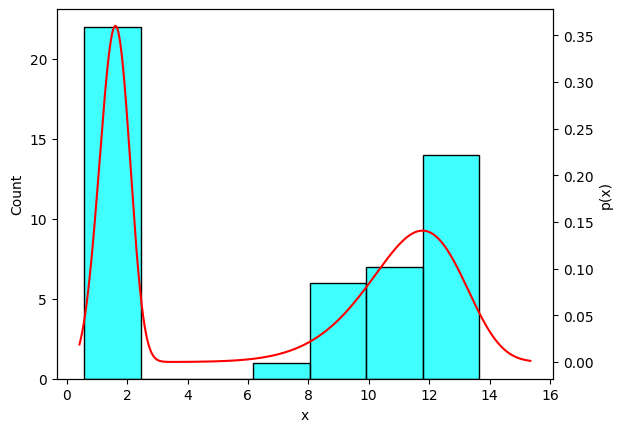



         name                                    params  prior_probability
0  WeibullExp   (4.064537863566914, 1.7963656671288943)               0.55
1  WeibullExp  (10.661524838459867, 12.301630139818016)               0.45
samples count: 100
time         : 0.098
steps        : 2 / 32
error        : None


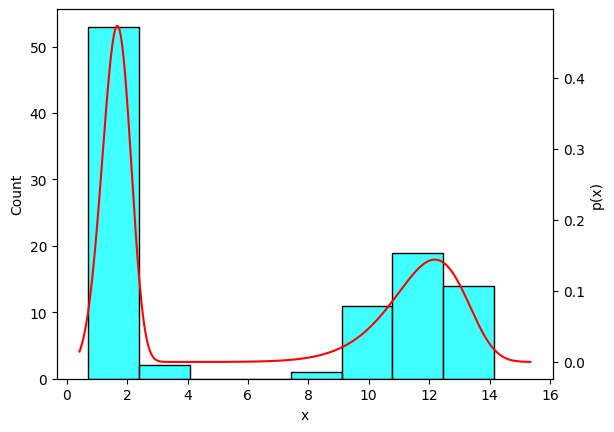



         name                                   params  prior_probability
0  WeibullExp  (4.324347936771127, 1.7755308354967907)            0.48499
1  WeibullExp  (7.571770907466523, 11.848016008009624)            0.51501
samples count: 200
time         : 0.218
steps        : 2 / 32
error        : None


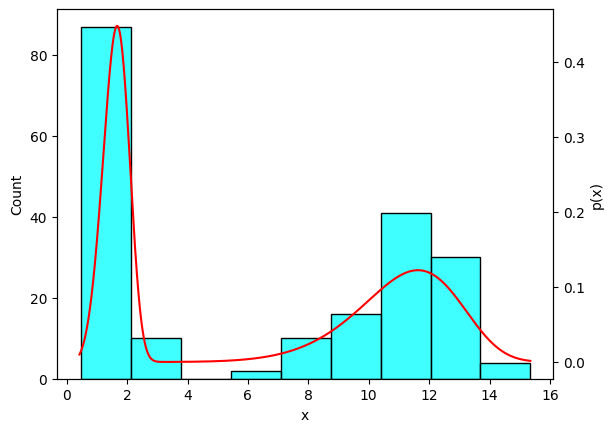



         name                                   params  prior_probability
0  WeibullExp  (3.933486604347201, 1.7992204963375682)           0.517991
1  WeibullExp  (7.742198923458812, 12.053085196757639)           0.482009
samples count: 500
time         : 1.794
steps        : 7 / 32
error        : None


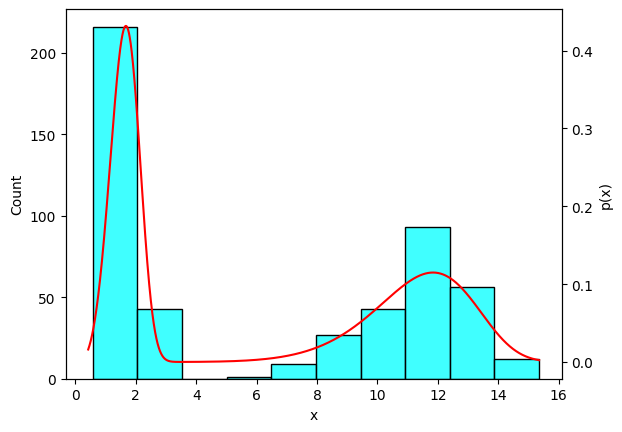



         name                                    params  prior_probability
0  WeibullExp    (1.885795746059719, 2.515635391746679)           0.363571
1  WeibullExp   (3.786667586709985, 12.561329446420611)           0.376150
2  WeibullExp  (34.048705538002736, 18.190821197389642)           0.260279
samples count: 50
time         : 0.995
steps        : 23 / 32
error        : None


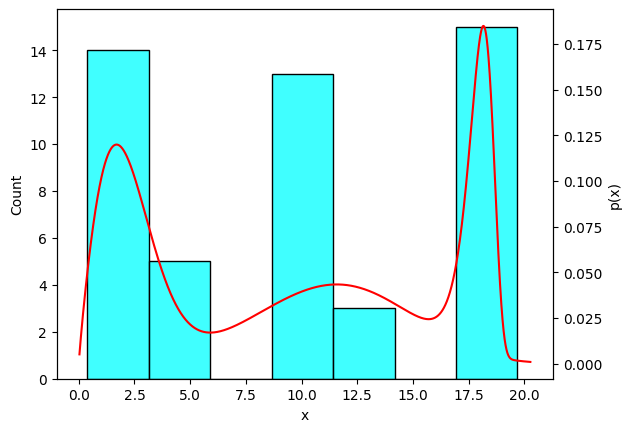



         name                                     params  prior_probability
0  WeibullExp    (2.6316547175001594, 2.926431053691037)           0.471019
1  WeibullExp  (107.12905184325379, 0.02804910577498667)           0.010000
2  WeibullExp    (3.787494284842725, 14.897362103612858)           0.518981
samples count: 100
time         : 11.126
steps        : 7 / 32
error        : None


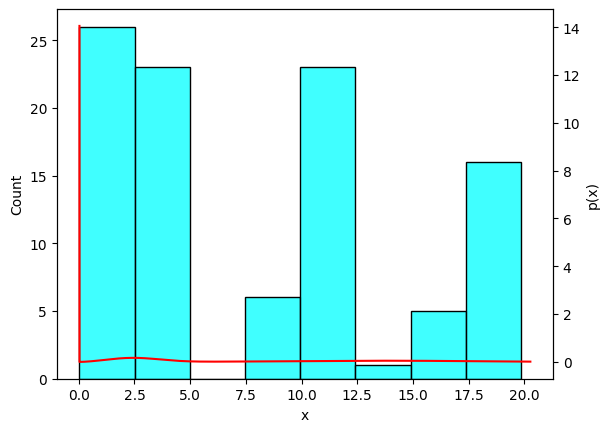



         name                                    params  prior_probability
0  WeibullExp  (4.1150457852555995, 15.318693312406737)           0.630600
1  WeibullExp   (2.384089453413806, 2.6306241101292116)           0.340338
2  WeibullExp   (9.834346600509242, 1.8567674128882934)           0.029062
samples count: 200
time         : 2.589
steps        : 17 / 32
error        : None


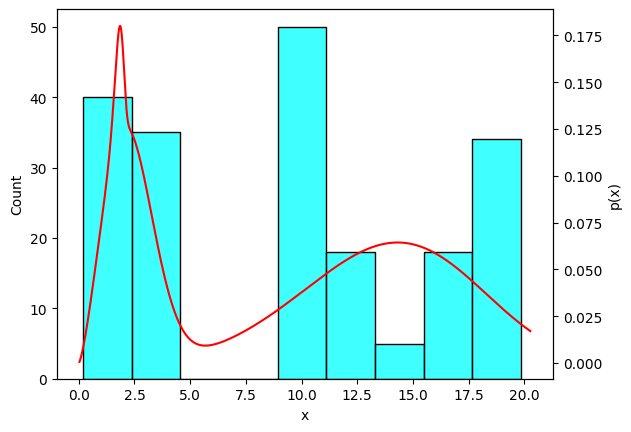



         name                                    params  prior_probability
0  WeibullExp    (1.434794491767634, 7.935665854641344)           0.729840
1  WeibullExp  (19.537036113933972, 18.263703059522758)           0.188346
2  WeibullExp   (25.18015238902224, 18.741393334266334)           0.081815
samples count: 500
time         : 7.900
steps        : 18 / 32
error        : None


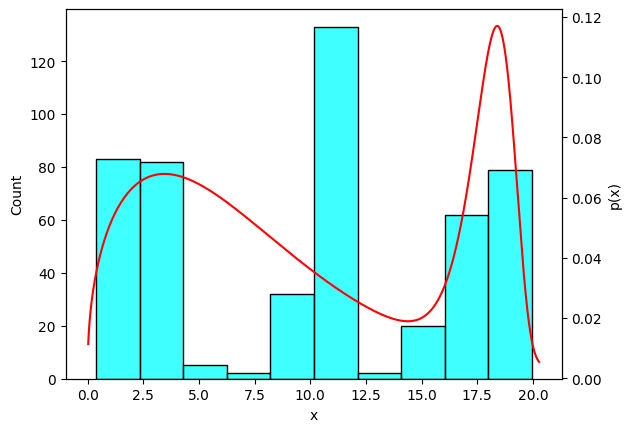



         name                                    params  prior_probability
0  WeibullExp   (22.00782147591545, 21.245717239278825)                NaN
1  WeibullExp             (inf, 5.958595534602544e-156)                NaN
2  WeibullExp  (10.530204715784144, 17.871943613463237)                NaN
3  WeibullExp   (20.902798330572526, 2.178900527797162)                NaN
samples count: 50
time         : 0.504
steps        : 6 / 32
error        : All models can't match due prior probability


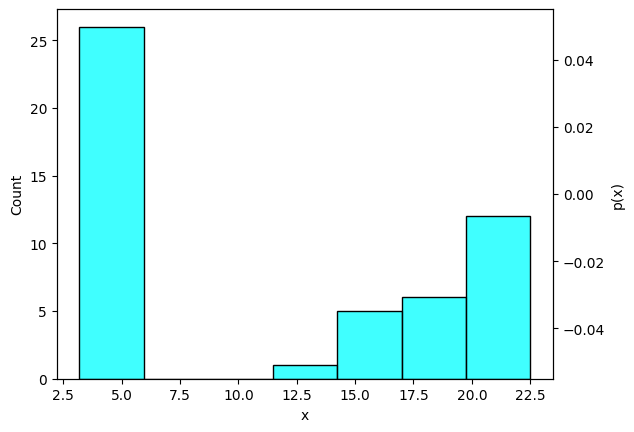



         name                                   params  prior_probability
0  WeibullExp  (8.988295931742549, 19.725704044680395)           0.470001
1  WeibullExp  (17.19829911458054, 4.2279051100046345)           0.370298
2  WeibullExp   (318.7812217392979, 4.523240639318767)           0.047200
3  WeibullExp    (27.57370859838459, 4.43875165467352)           0.112501
samples count: 100
time         : 1.414
steps        : 12 / 32
error        : None


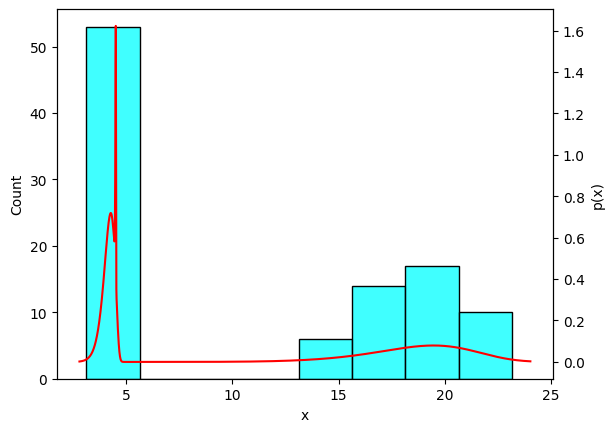



         name                                   params  prior_probability
0  WeibullExp  (20.441509688331422, 4.099014860433296)           0.349185
1  WeibullExp  (36.19968957557312, 12.717917630010746)           0.017549
2  WeibullExp  (35.442486901248444, 4.530847404035638)           0.130815
3  WeibullExp   (12.244898483009484, 20.2444338016454)           0.502451
samples count: 200
time         : 8.093
steps        : 28 / 32
error        : None


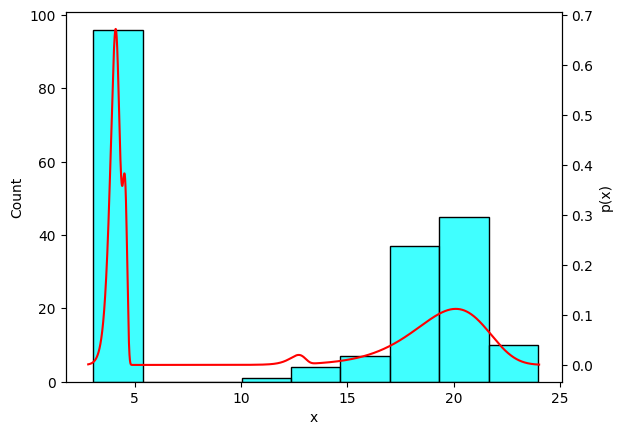



         name                                    params  prior_probability
0  WeibullExp  (15.318481227710176, 4.2496804707021045)           0.494000
1  WeibullExp  (13.266376963000187, 20.911935035228183)           0.214595
2  WeibullExp   (24.39230471199199, 11.377373050898145)           0.003604
3  WeibullExp   (10.112975976943588, 19.32928416078415)           0.287802
samples count: 500
time         : 7.430
steps        : 11 / 32
error        : None


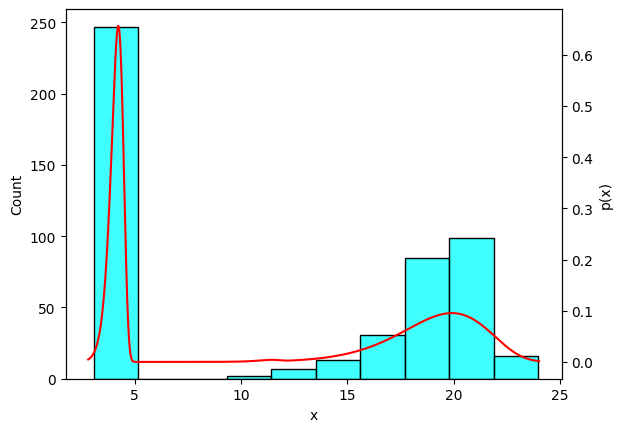



         name                                    params  prior_probability
0  WeibullExp   (21.701590166453993, 5.948404509854892)           0.257473
1  WeibullExp   (19.724630018506907, 17.45645730348926)                NaN
2  WeibullExp  (1.9862650621389895, 15.024611950141741)           0.454043
3  WeibullExp  (13.526462047429918, 10.155709785006055)           0.252814
4  WeibullExp    (90.10518836002042, 4.293659634468896)           0.035670
samples count: 50
time         : 1.661
steps        : 25 / 32
error        : None


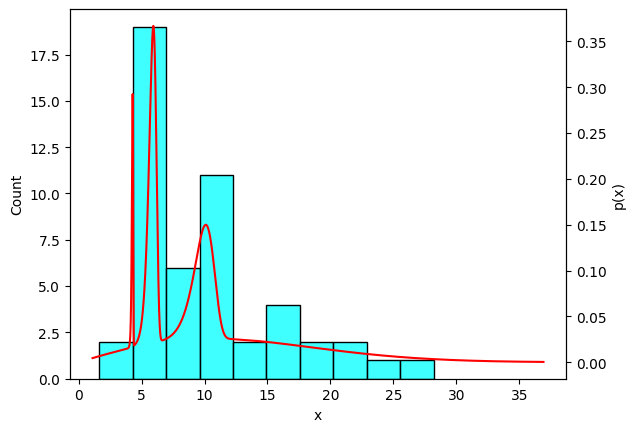



         name                                    params  prior_probability
0  WeibullExp   (60.92614477864492, 22.861194150594926)           0.024602
1  WeibullExp    (14.59555882405319, 26.90604140939793)           0.036403
2  WeibullExp    (3.059978766518184, 9.960150234621464)           0.752262
3  WeibullExp  (12.620905407866742, 17.702838547303923)           0.176875
4  WeibullExp  (256.66498806052925, 1.8486677399545959)           0.009857
samples count: 100
time         : 37.331
steps        : 32 / 32
error        : None


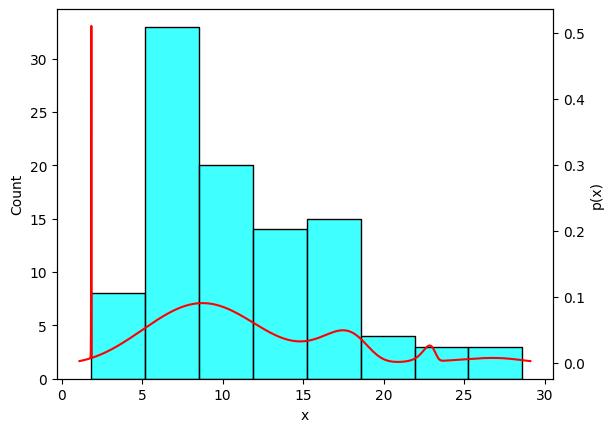



         name                                    params  prior_probability
0  WeibullExp  (9.550367142551352, 0.41381698015444496)                NaN
1  WeibullExp    (9.365706876136082, 6.051165419601065)           0.128951
2  WeibullExp   (4.296323455092661, 10.938730722500685)           0.587522
3  WeibullExp   (9.648526529945846, 21.408951260558393)           0.068800
4  WeibullExp   (5.684246021313871, 17.342022879430626)           0.214727
samples count: 200
time         : 3.899
steps        : 14 / 32
error        : None


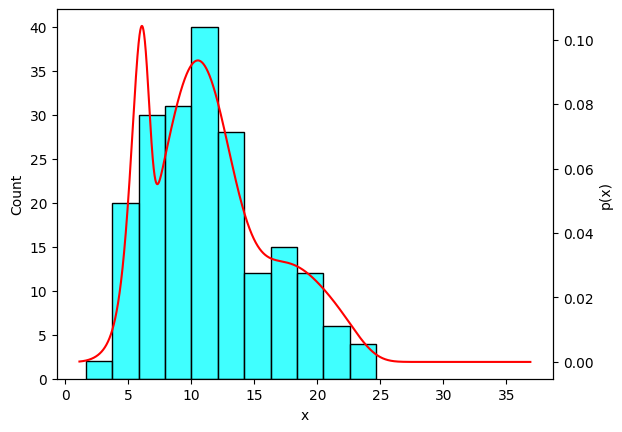



         name                                    params  prior_probability
0  WeibullExp  (49.295265533666935, 1.2635854880627748)                NaN
1  WeibullExp    (6.1929809511626726, 16.2106174219034)           0.144827
2  WeibullExp    (4.203621432115218, 18.64846850502376)           0.113050
3  WeibullExp     (3.305195949642618, 9.54114892947581)           0.577569
4  WeibullExp  (2.1631542235801464, 15.541083987470218)           0.164554
samples count: 500
time         : 14.514
steps        : 20 / 32
error        : None


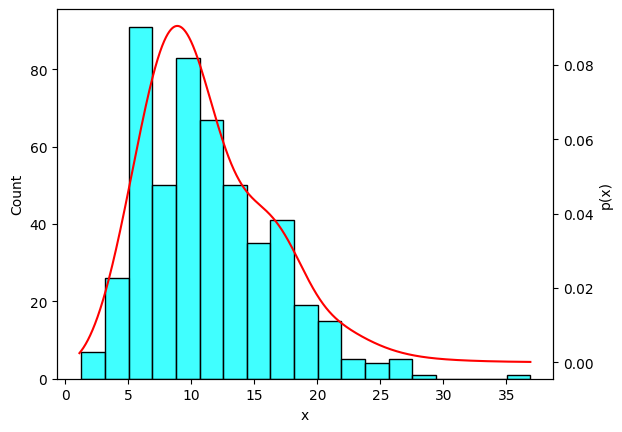



       name                                    params  prior_probability
0  Gaussian  (-17.21852634638116, 28.426240990272472)                1.0
samples count: 50
time         : 0.058
steps        : 2 / 32
error        : None


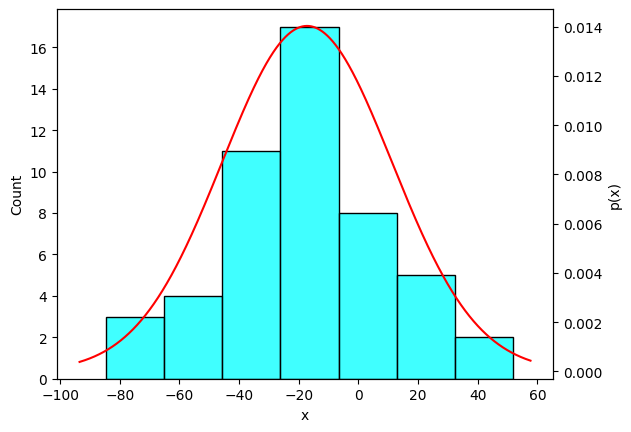



       name                                   params  prior_probability
0  Gaussian  (-14.81375836122647, 26.70582121375422)                1.0
samples count: 100
time         : 0.079
steps        : 2 / 32
error        : None


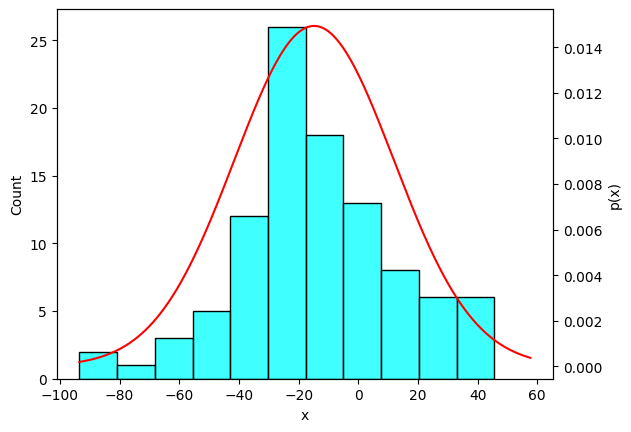



       name                                     params  prior_probability
0  Gaussian  (-15.726345785108318, 24.315723718802822)                1.0
samples count: 200
time         : 0.089
steps        : 2 / 32
error        : None


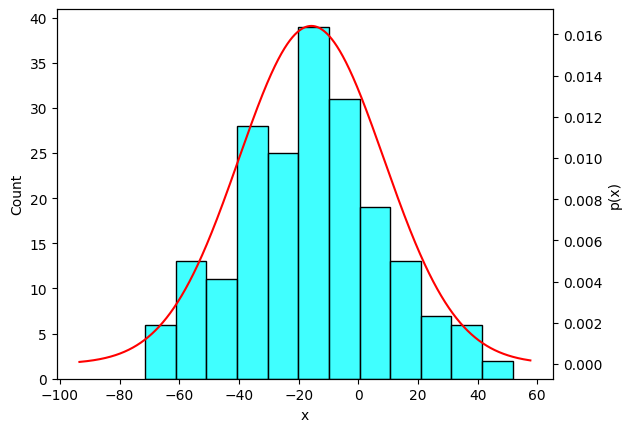



       name                                    params  prior_probability
0  Gaussian  (-15.174843114726679, 22.41370058236127)                1.0
samples count: 500
time         : 0.227
steps        : 2 / 32
error        : None


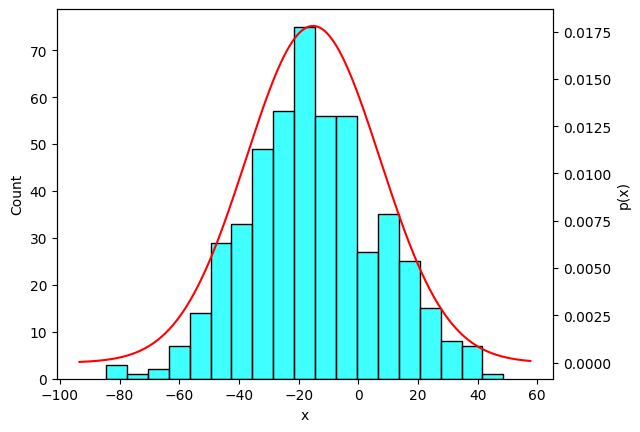



       name                                    params  prior_probability
0  Gaussian   (12.325427199979309, 8.357004743353949)           0.456203
1  Gaussian  (-18.01208718221902, 13.896597084564204)           0.543797
samples count: 50
time         : 0.824
steps        : 32 / 32
error        : None


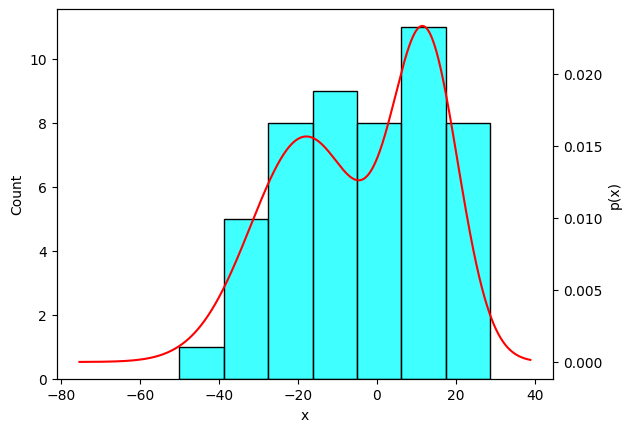



       name                                    params  prior_probability
0  Gaussian    (9.788884201512465, 8.533155663771849)            0.60048
1  Gaussian  (-22.24618836348387, 14.173185683451981)            0.39952
samples count: 100
time         : 2.247
steps        : 32 / 32
error        : None


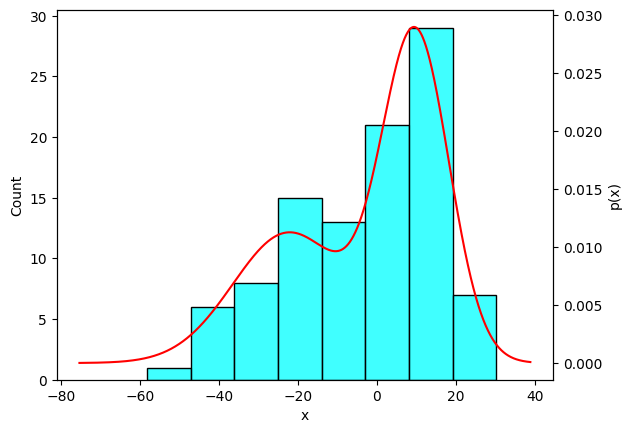



       name                                     params  prior_probability
0  Gaussian      (6.02043178717531, 9.023803559357088)           0.539818
1  Gaussian  (-19.470823953477147, 17.836875366222483)           0.460182
samples count: 200
time         : 2.391
steps        : 32 / 32
error        : None


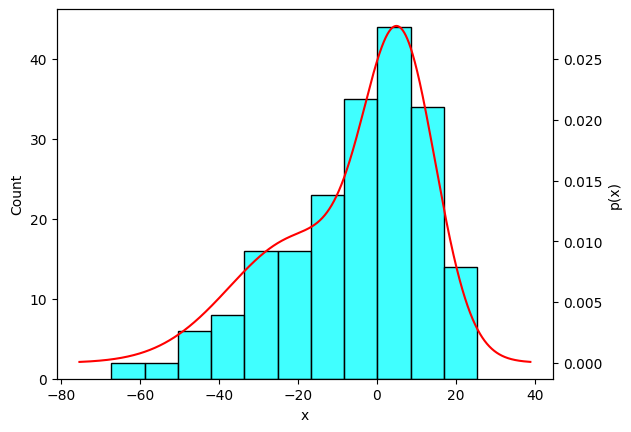



       name                                     params  prior_probability
0  Gaussian  (-13.811291614923702, 18.371481743876586)           0.514093
1  Gaussian     (8.101056335345831, 9.927022803597625)           0.485907
samples count: 500
time         : 5.544
steps        : 24 / 32
error        : None


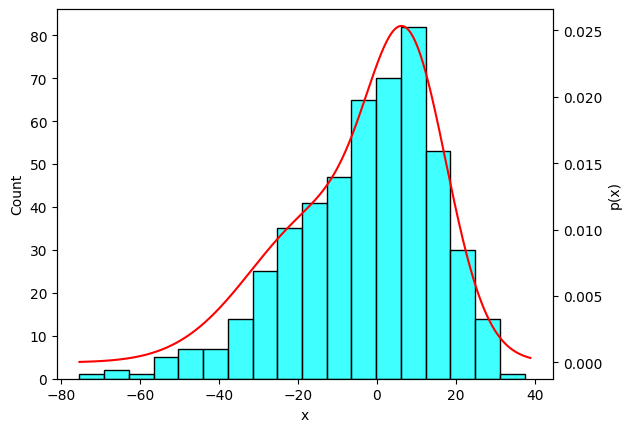



       name                                    params  prior_probability
0  Gaussian   (6.803668932661357, 20.744846153092087)           0.319603
1  Gaussian   (8.292729961214839, 5.4786408783991085)           0.417458
2  Gaussian  (-14.914596928285597, 4.742090704544861)           0.262939
samples count: 50
time         : 1.108
steps        : 32 / 32
error        : None


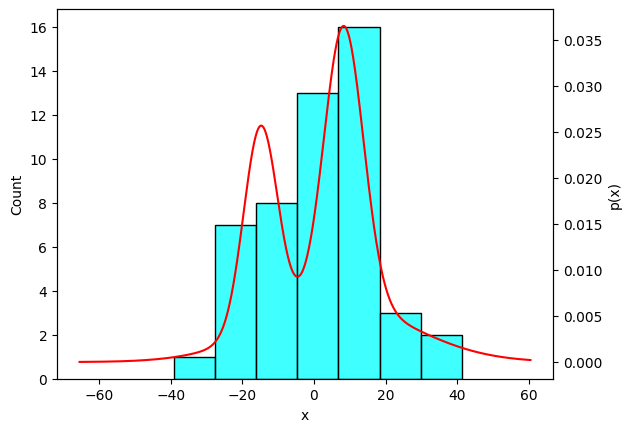



       name                                     params  prior_probability
0  Gaussian   (-31.988956586375078, 9.399910018231335)           0.087848
1  Gaussian  (0.33313840444602266, 18.932367133984275)           0.565146
2  Gaussian    (7.733735776931685, 3.8828306014067406)           0.347006
samples count: 100
time         : 2.168
steps        : 32 / 32
error        : None


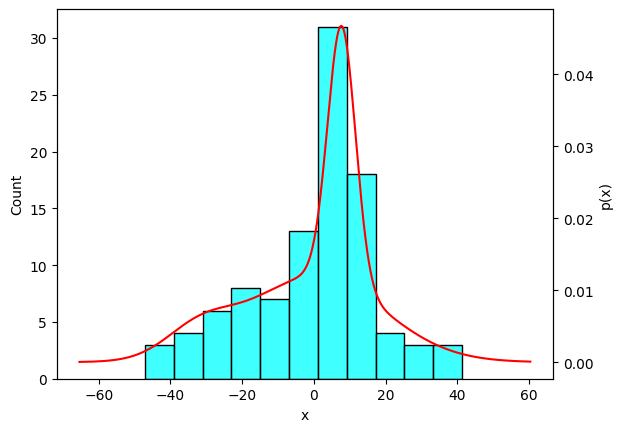



       name                                       params  prior_probability
0  Gaussian     (-10.634708655429465, 18.89382587970443)           0.425432
1  Gaussian     (10.561898971882993, 13.768691322125866)           0.526810
2  Gaussian  (-0.039774975224300624, 5.7788534801136135)           0.047758
samples count: 200
time         : 4.302
steps        : 32 / 32
error        : None


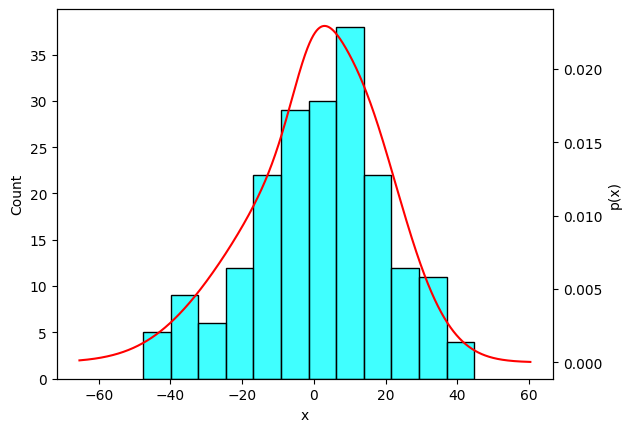



       name                                     params  prior_probability
0  Gaussian       (6.352236849573505, 5.4703992404754)           0.345673
1  Gaussian    (0.8621392152381501, 21.94149187416658)           0.579015
2  Gaussian  (-19.626095935876595, 15.943975908999422)           0.075311
samples count: 500
time         : 10.860
steps        : 32 / 32
error        : None


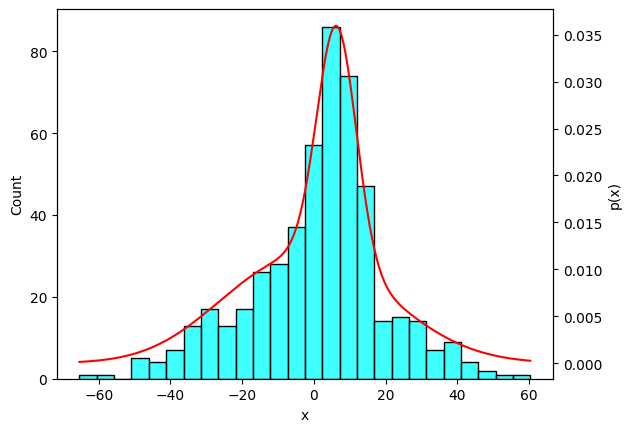



       name                                    params  prior_probability
0  Gaussian    (2.416200881567443, 9.623339994660533)           0.217346
1  Gaussian   (16.599647494876862, 6.383295643176534)           0.259225
2  Gaussian  (-16.11031594899841, 4.2753746641956845)           0.254997
3  Gaussian  (-4.5107269839277215, 6.716873838688041)           0.268432
samples count: 50
time         : 1.744
steps        : 32 / 32
error        : None


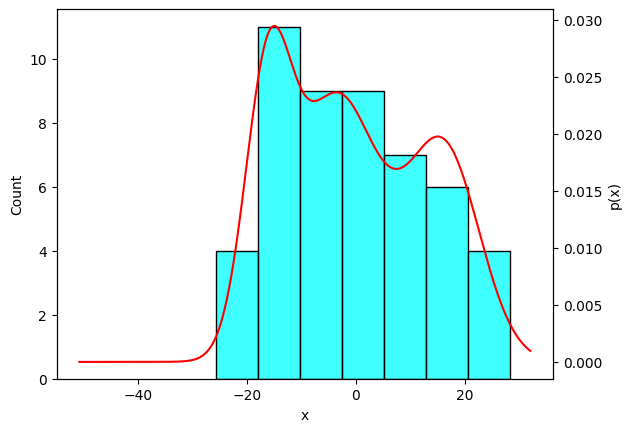



       name                                     params  prior_probability
0  Gaussian  (-14.352414181491476, 10.005208707313981)           0.431987
1  Gaussian   (13.583347518623002, 3.8874424792057725)           0.244243
2  Gaussian  (-3.2226998353397973, 0.8142255787554302)           0.105619
3  Gaussian     (6.481636976291618, 4.714123090818244)           0.218150
samples count: 100
time         : 3.159
steps        : 32 / 32
error        : None


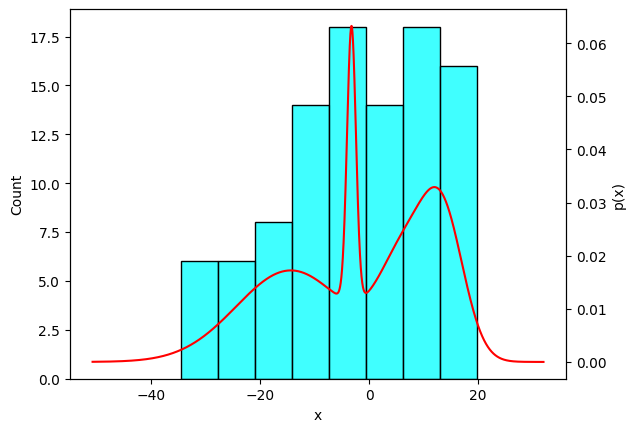



       name                                     params  prior_probability
0  Gaussian     (2.057422131175022, 8.746829685567228)           0.204300
1  Gaussian    (13.245073482743992, 4.927670777683147)           0.231485
2  Gaussian   (-10.895104484992656, 8.611431993863945)           0.330182
3  Gaussian  (-14.486955800345154, 13.681338078389558)           0.234033
samples count: 200
time         : 6.395
steps        : 32 / 32
error        : None


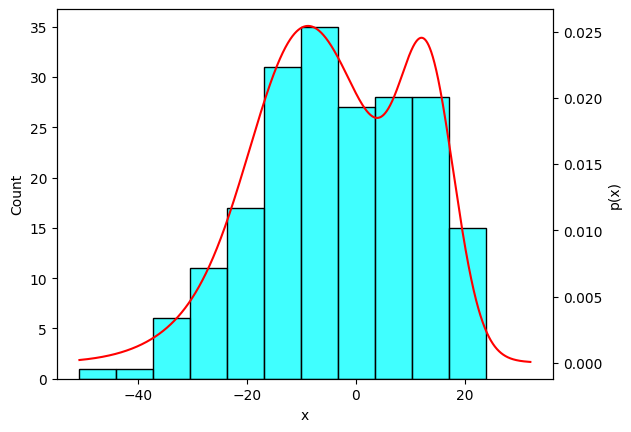



       name                                     params  prior_probability
0  Gaussian  (-3.2506847350496333, 0.4939190018953734)           0.029339
1  Gaussian    (11.634936397340823, 6.321331776333356)           0.220752
2  Gaussian   (-9.859298081652664, 12.593871989603368)           0.691335
3  Gaussian     (12.87745568212842, 3.270980494698922)           0.058573
samples count: 500
time         : 16.392
steps        : 32 / 32
error        : None


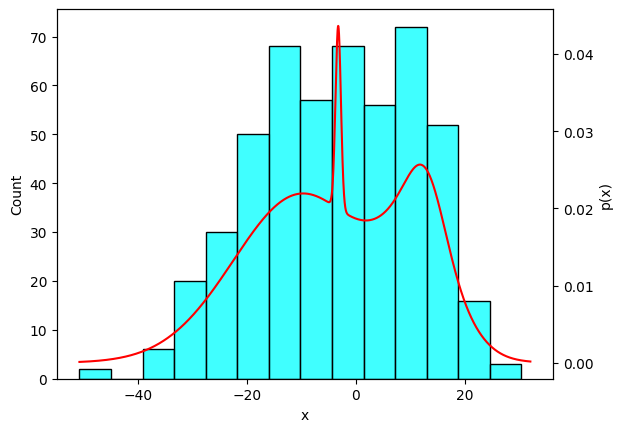



       name                                     params  prior_probability
0  Gaussian  (-15.944269905135577, 2.3903660935269664)           0.205076
1  Gaussian    (-8.949964550540749, 16.55698733375701)           0.205067
2  Gaussian    (5.640132207312435, 13.134914364106141)           0.174477
3  Gaussian    (-9.849685708694182, 16.64189314037896)           0.209052
4  Gaussian    (-8.539353863586207, 16.49267619731316)           0.206328
samples count: 50
time         : 1.541
steps        : 32 / 32
error        : None


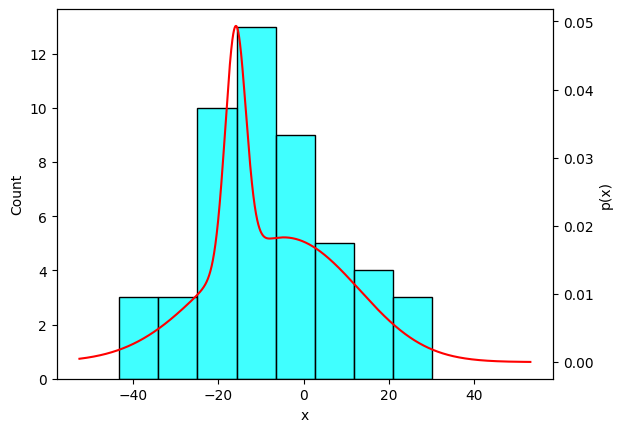



       name                                    params  prior_probability
0  Gaussian   (-14.33994706157539, 5.186653936513747)           0.289553
1  Gaussian  (17.724372129508545, 13.675150035330761)           0.127801
2  Gaussian  (-14.340921823385278, 13.88342260991158)           0.223595
3  Gaussian   (1.8368786013030856, 3.971827621487017)           0.197320
4  Gaussian   (5.1349987025410195, 17.43258825035854)           0.161730
samples count: 100
time         : 3.544
steps        : 32 / 32
error        : None


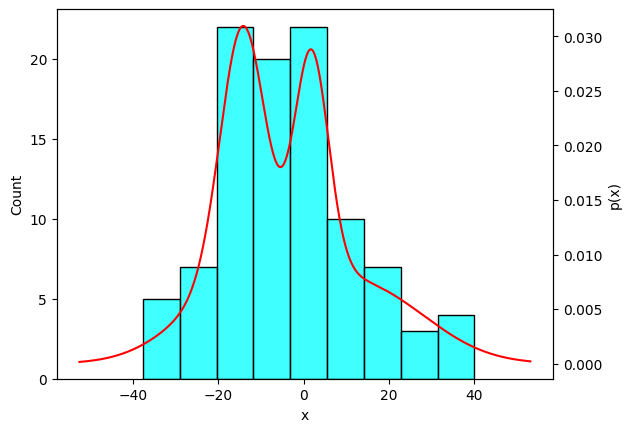



       name                                      params  prior_probability
0  Gaussian      (6.154506635817661, 6.770122179441906)           0.096800
1  Gaussian    (-13.825984395248211, 6.606431985040258)           0.345049
2  Gaussian  (-0.02756076889752253, 20.988019291494282)           0.207662
3  Gaussian   (-10.894245901198962, 17.559155998355376)           0.225995
4  Gaussian      (11.267103253095645, 9.97428295472701)           0.124494
samples count: 200
time         : 5.863
steps        : 32 / 32
error        : None


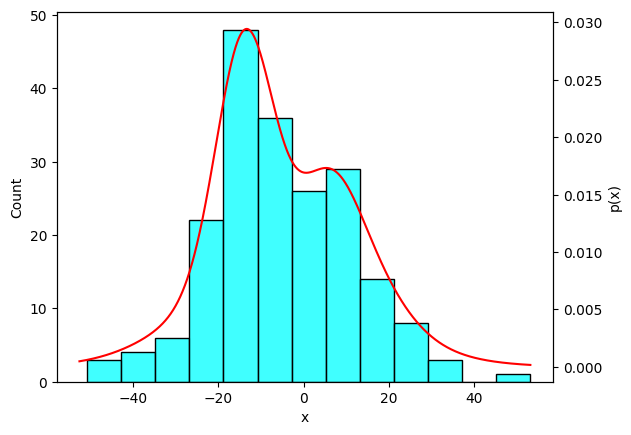



       name                                     params  prior_probability
0  Gaussian  (-14.314302975822867, 13.259188895573889)           0.259740
1  Gaussian   (2.1343731204247227, 16.269580688714328)           0.241199
2  Gaussian   (1.8883386157681263, 16.331424668860407)           0.228545
3  Gaussian     (5.143941247841416, 9.871408765159957)           0.031935
4  Gaussian    (-11.224716309609422, 7.91963695218457)           0.238581
samples count: 500
time         : 13.239
steps        : 32 / 32
error        : None


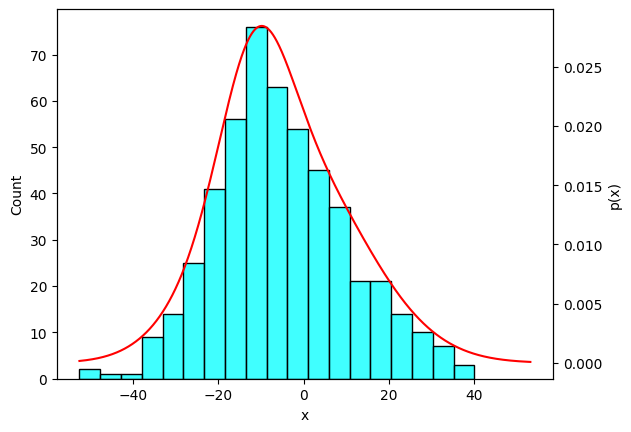

In [4]:
for result in results:

    table = [
        [
            d.model.name(),
            tuple(d.model.params_convert_from_model(d.params)),
            d.prior_probability
        ]
        for d in result.result.distributions
    ]
    df = pd.DataFrame(table, columns=["name", "params", "prior_probability"])
    print(df)
    print(f"samples count: {len(result.test.data)}")
    print(f"time         : {result.time:.3f}")
    print(f"steps        : {result.result.steps} / {result.test.max_step}")
    print(f"error        : {result.result.error}")

    fig, ax1 = plt.subplots()
    ax1.set_xlabel("x")

    sns.histplot(result.test.data, color="cyan")
    ax2 = ax1.twinx()
    ax2.set_ylabel("p(x)")

    min_data = min(result.test.base_data)
    max_data = max(result.test.base_data)

    def p(x):
        s = 0
        for d in result.result.distributions:
            if d.prior_probability is not None:
                s += d.prior_probability * d.model.p(x, d.params)
        return s

    X = list(np.linspace(min_data, max_data, int(np.abs(max_data - min_data) * 512)))
    Y = [p(x) for x in X]
    ax2.plot(X, Y, color="red")
    plt.show()
    print()
    print()